# Utilisation des datas envoyés par Agnès R

La première partie de ce Notebook aura pour objectif d'ouvrir les fichier ```.t_dat```.

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns


In [ ]:
#zone 1 (paramètres reçus d'Agnès R)
#permeabilite_1= 3.5e-05
#conductivite_1 = 2.
#porosity_1 = 0.280
#c_s_1 3804.248366013072
#Density_1=850 

Ici on sépare les deux tiges (composées de 4 capteurs) qui scrutent la rive gauche ```temp_riv_g``` et la rive droite ```temp_riv_d```.

*En réalité on ne sait pas si on représente les bonnes rives à travers ces variables*

In [18]:
temp_capt= pd.read_table('S_temp_PT100_t.dat', delim_whitespace=True, header=None)
temp_riv = pd.read_table('E_tempT_Riv.dat', delim_whitespace=True, header=None) # températures de la rivière
dt= temp_capt.loc[0,0] # le pas de temps en secondes ici 600 s
temp_capt_g = temp_capt.loc[:,0:4]
temp_capt_d=temp_capt.drop(columns=[1,2,3,4])


C:\Users\vargo\AppData\Local\Temp\ipykernel_27748\1620569570.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temp_capt= pd.read_table('S_temp_PT100_t.dat', delim_whitespace=True, header=None)
C:\Users\vargo\AppData\Local\Temp\ipykernel_27748\1620569570.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  temp_riv = pd.read_table('E_tempT_Riv.dat', delim_whitespace=True, header=None) # températures de la rivière


In [27]:
temp_riv.columns

Index([1, 0], dtype='int64')

In [30]:
if len(temp_riv.columns)==1:
    temp_riv.columns = [1]
temp_riv[0]=temp_capt[0]


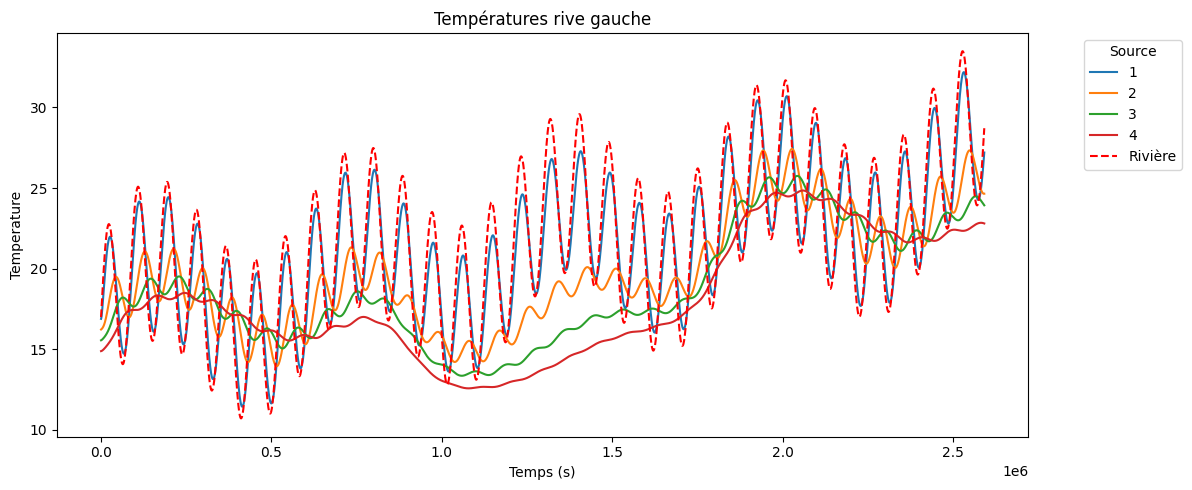

In [35]:
import matplotlib.pyplot as plt

def plot_with_legend(df, title,grandeur):
    # df doit contenir la colonne 0 comme temps et les autres colonnes comme capteurs
    if df.shape[1] <= 1:
        print(f"Aucun capteur à tracer pour: {title} (shape={df.shape})")
        return
        
    plt.figure(figsize=(12, 5))
    
    # Tracer les capteurs
    df_long = df.melt(id_vars=0, var_name='Capteur', value_name=grandeur)
    sns.lineplot(data=df_long, x=0, y=grandeur, hue='Capteur', palette='tab10')
    
    # Tracer la rivière
    temp_riv_long = temp_riv.copy()
    temp_riv_long['Source'] = 'Rivière'  # Ajouter une colonne pour la légende
    sns.lineplot(data=temp_riv_long, x=0, y=1, label='Rivière', color='red', linestyle='--')
    
    plt.xlabel('Temps (s)')
    plt.ylabel(grandeur)
    plt.title(title)
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Tracer rive gauche
plot_with_legend(temp_capt_g, 'Températures rive gauche','Temperature')

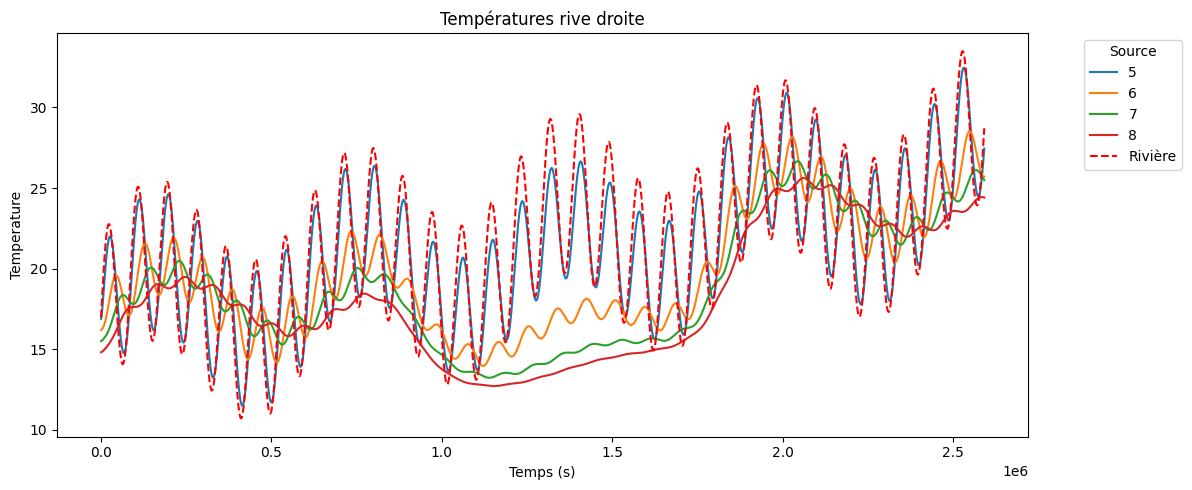

In [36]:
plot_with_legend(temp_capt_d, 'Températures rive droite','Temperature')

Pareil pour la charge de la **en profondeur** :

C:\Users\vargo\AppData\Local\Temp\ipykernel_27748\1301683046.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  charge_capt= pd.read_table('S_charge_40cm_dt.dat', delim_whitespace=True, header=None)
C:\Users\vargo\AppData\Local\Temp\ipykernel_27748\1301683046.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  charge_riv= pd.read_table('E_chargeT_Riv.dat', delim_whitespace=True, header=None) # charges de la rivière


<Axes: xlabel='0', ylabel='1'>

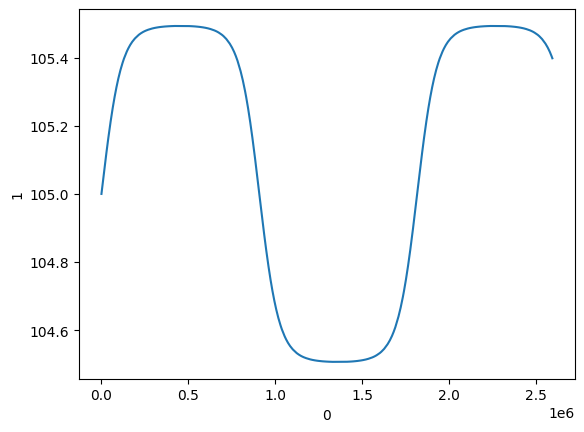

In [ ]:
charge_capt= pd.read_table('S_charge_40cm_dt.dat', delim_whitespace=True, header=None)
charge_riv= pd.read_table('E_chargeT_Riv.dat', delim_whitespace=True, header=None) # charges de la rivière
charge_riv.columns=[1]
charge_riv[0]=charge_capt[0]


In [70]:

charge_capt_g = charge_capt.loc[:,0:1]
charge_capt_d = charge_capt.drop(columns=[1])

def trace_charge(df, rive, plot_riv=True):
    """Trace la charge du dernier capteur (df) et, si disponible, la charge de la rivière.
    df : DataFrame contenant au moins deux colonnes [time, charge]
    rive : string pour le titre ('gauche'/'droite')
    plot_riv : bool, si True et si charge_riv est présent, superpose la courbe rivière
    """
    plt.figure(figsize=(12, 5))
    t = df.columns[0]
    c = df.columns[1]

    # tracer le capteur
    sns.lineplot(data=df, x=t, y=c, label=f'Capteur ({rive})')

    # tracer la rivière si disponible
    if plot_riv and 'charge_riv' in globals():
        try:
            # charge_riv est attendu avec colonne temps en 0 et charge en 1
            sns.lineplot(data=charge_riv, x=0, y=1, label='Charge rivière', color='red', linestyle='--')
        except Exception as e:
            print(f"Impossible de tracer charge_riv automatiquement : {e}")

    plt.xlabel('Temps (s)')
    plt.ylabel('Charge')
    plt.title('Charge du dernier capteur - rive ' + rive)
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



def trace_delta_charge(df, rive, plot_riv=True):
    """Trace la charge du dernier capteur (df) et, si disponible, la charge de la rivière.
    df : DataFrame contenant au moins deux colonnes [time, charge]
    rive : string pour le titre ('gauche'/'droite')
    plot_riv : bool, si True et si charge_riv est présent, superpose la courbe rivière
    """
    plt.figure(figsize=(12, 5))
    t = df.columns[0]
    c = df.columns[1]
    df['diff']=df[1]-charge_riv[1]

    # tracer le capteur
    sns.lineplot(data=df, x=t, y='diff', label=f'Capteur ({rive})')

    plt.xlabel('Temps (s)')
    plt.ylabel('Charge')
    plt.title('Charge du dernier capteur - rive ' + rive)
    plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



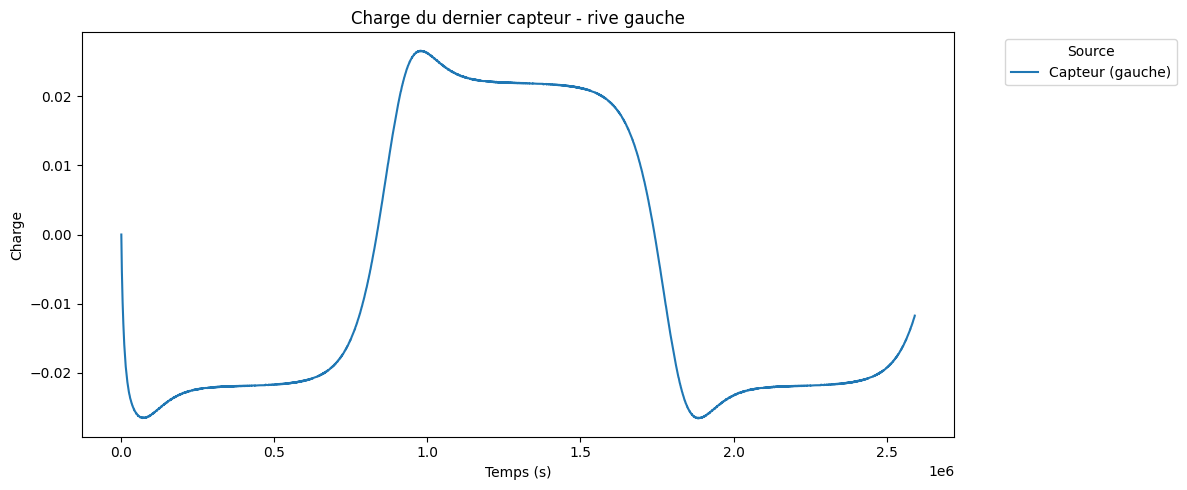

In [71]:
# appels
trace_delta_charge(charge_capt_g, 'gauche')

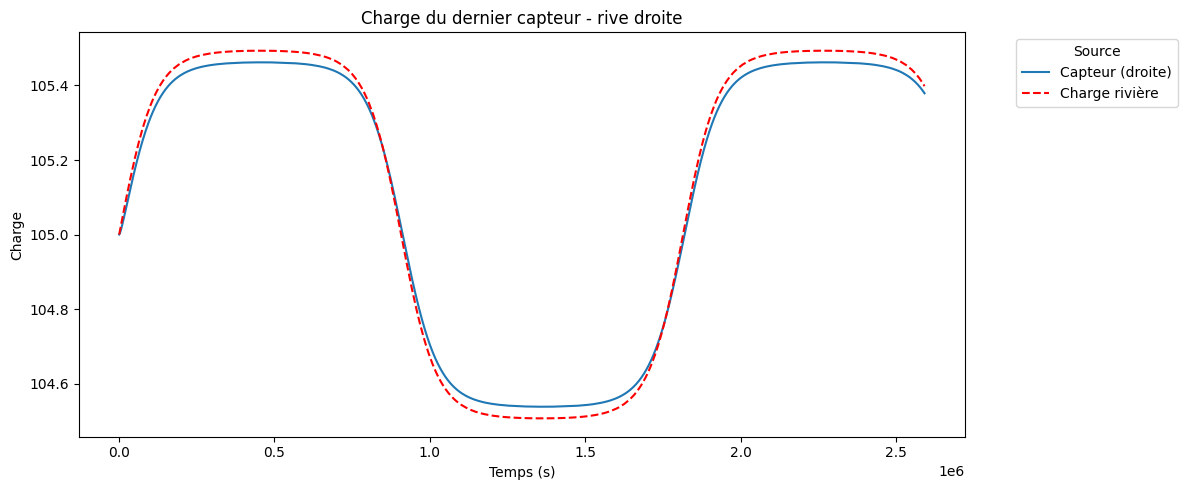

In [66]:
trace_charge(charge_capt_d, 'droite')